# **House Prices: Advanced Regression Techniques**

Name: Neta Ben Mordechai  
Name: Itay Chabra

Link to Kaggle: https://www.kaggle.com/itaychabra

---

## **Overview**  
In this project, the objective is to predict the sale prices of homes in Ames, Iowa, using a variety of regression techniques, including K-Nearest Neighbors (KNN), Decision Trees, and ensemble methods like Bagging, Random Forest, and Gradient Boosting. The dataset undergoes preprocessing steps, including encoding categorical variables, scaling numerical features, selecting relevant features based on correlation analysis and removing outliers.

Multiple models are constructed and evaluated based on performance metrics like Root Mean Squared Error (RMSE), with hyperparameter tuning to optimize model configurations. Principal Component Analysis (PCA) is applied to reduce dimensionality and assess its impact on model performance. The best-performing model is validated on a test dataset, and predictions are saved for final evaluation.

The goal is to build a reliable and accurate predictive model that combines various regression approaches and optimizes them for the best possible results.

---

### Imports

In [690]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import ColumnTransformer

## Data Investigation and Preprocessing  

---

Import train and test datasets

In [694]:
train = pd.read_csv('houseprices/train.csv')
test = pd.read_csv('houseprices/test.csv')

In [696]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [698]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [700]:
print ("Train: ",train.shape[0],"sales, and ",train.shape[1],"features")
print ("Test: ",test.shape[0],"sales, and ",test.shape[1],"features")

Train:  1460 sales, and  81 features
Test:  1459 sales, and  80 features


**Data fields**

- `SalePrice` - the property's sale price in dollars. This is the `target` variable that we are trying to predict.

- MSSubClass: The building class

- MSZoning: The general zoning classification

- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet

- Street: Type of road access

- Alley: Type of alley access

- LotShape: General shape of property

- LandContour: Flatness of the property

- Utilities: Type of utilities available

- LotConfig: Lot configuration

- LandSlope: Slope of property

- Neighborhood: Physical locations within Ames city limits

- Condition1: Proximity to main road or railroad

- Condition2: Proximity to main road or railroad (if a second is present)

- BldgType: Type of dwelling

- HouseStyle: Style of dwelling

- OverallQual: Overall material and finish quality

- OverallCond: Overall condition rating

- YearBuilt: Original construction date

- YearRemodAdd: Remodel date

- RoofStyle: Type of roof

- RoofMatl: Roof material

- Exterior1st: Exterior covering on house

- Exterior2nd: Exterior covering on house (if more than one material)

- MasVnrType: Masonry veneer type

- MasVnrArea: Masonry veneer area in square feet

- ExterQual: Exterior material quality

- ExterCond: Present condition of the material on the exterior

- Foundation: Type of foundation

- BsmtQual: Height of the basement

- BsmtCond: General condition of the basement

- BsmtExposure: Walkout or garden level basement walls

- BsmtFinType1: Quality of basement finished area

- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Quality of second finished area (if present)

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- Heating: Type of heating

- HeatingQC: Heating quality and condition

- CentralAir: Central air conditioning

- Electrical: Electrical system

- 1stFlrSF: First Floor square feet

- 2ndFlrSF: Second floor square feet

- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade

- HalfBath: Half baths above grade

- Bedroom: Number of bedrooms above basement level

- Kitchen: Number of kitchens

- KitchenQual: Kitchen quality

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- Functional: Home functionality rating

- Fireplaces: Number of fireplaces

- FireplaceQu: Fireplace quality

- GarageType: Garage location

- GarageYrBlt: Year garage was built

- GarageFinish: Interior finish of the garage

- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

- GarageCond: Garage condition

- PavedDrive: Paved driveway

- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

- PoolQC: Pool quality

- Fence: Fence quality

- MiscFeature: Miscellaneous feature not covered in other categories

- MiscVal: $Value of miscellaneous feature

- MoSold: Month Sold

- YrSold: Year Sold

- SaleType: Type of sale

- SaleCondition: Condition of sale

We can drop the `Id` colum since it's unnecessary for the prediction process

In [704]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

**Why Combine Train and Test Datasets?**

This function combines the train and test datasets into a single dataframe (`all_data`) to ensure consistent preprocessing and feature engineering. By merging the datasets:
- We apply transformations (encoding, scaling, handling missing values) uniformly across both train and test sets, avoiding inconsistencies.
- It simplifies feature engineering tasks that require analyzing the entire dataset.
- After preprocessing, the datasets can be split back into their original train and test sets.

In [707]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

In [709]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

## Correlation between features and SalePrice  
We will present a heatmap of the features which have a correlation with the target of 0.5 and above

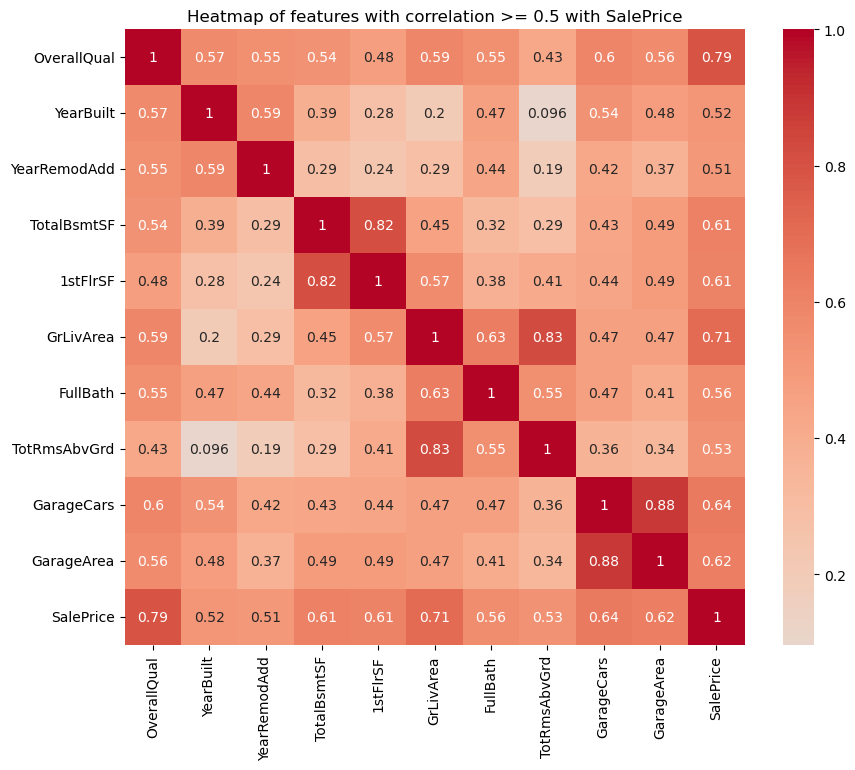

In [712]:
numeric_data = train.select_dtypes(include=['number'])
corr_mat = numeric_data.corr()
high_corr = corr_mat['SalePrice'][abs(corr_mat['SalePrice']) >= 0.5]
high_corr_features = high_corr.index
filtered_corr_mat = corr_mat.loc[high_corr_features, high_corr_features]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_mat, annot=True, cmap='coolwarm', center=0)
plt.title(f'Heatmap of features with correlation >= 0.5 with SalePrice')
plt.show()

We noticed that two features, `GarageArea` and `GarageCars`, have a high correlation of 0.88. Since they provide similar information, we decided to remove one of them to reduce multicollinearity and improve the model's performance.  
To make this decision, we considered the correlation with the target variable, `SalePrice`. Since `GarageArea` has a slightly lower correlation with `SalePrice` compared to `GarageCars`, we chose to drop `GarageArea`.

In [714]:
all_data.drop("GarageArea", axis=1, inplace=True)

## Handle Missing Data

Text(0.5, 1.0, 'Percent missing data by feature')

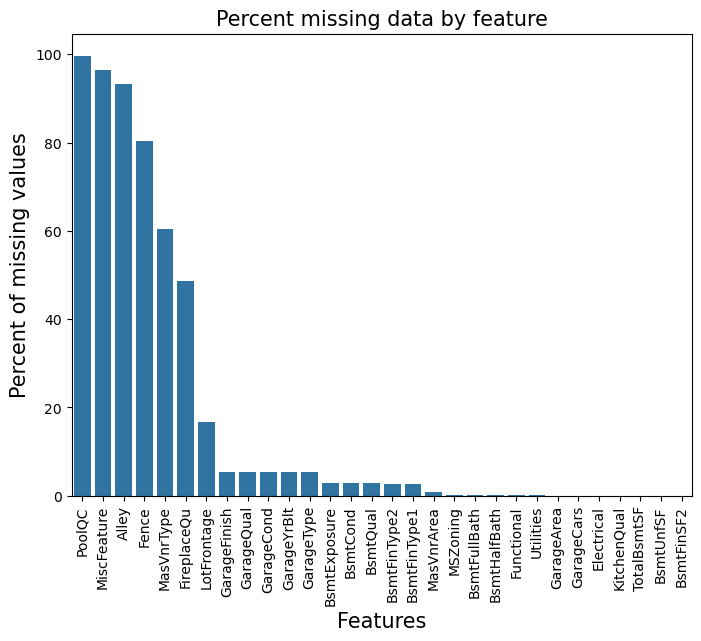

In [716]:
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [717]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

- **PoolQC** : Since PoolQC has the highest null values according to the data documentation says **null values means 'No Pool'.** Since majority of houses has no pool. So we will replace those null values with 'None'.

In [721]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

- **MiscFeature** : Data documentation says NA means "no misc feature"

In [723]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

- **Alley** : data description says NA means "no alley access"

In [725]:
all_data["Alley"] = all_data["Alley"].fillna("None")

- **Fence** : data description says NA means "no fence"

In [730]:
all_data["Fence"] = all_data["Fence"].fillna("None")

- **MasVnrType, MasVnrArea** : data description says NA means "no masonry veneer"

In [734]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")

In [735]:
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **FireplaceQu** : data description says NA means "no fireplace"

In [738]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

- **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [743]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None as per documentation.

In [746]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')

- **GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [749]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)

- **GarageYrBlt** : If GarageYrBlt is missing, and the house has a garage (GarageType != 'None'), we will fill it with the house's YearBuilt or YearRemodAdd.

In [752]:
all_data["GarageYrBlt"] = np.where(
    all_data["GarageType"] != "None",  # Check if the house has a garage
    all_data["GarageYrBlt"].fillna(all_data["YearBuilt"]),  # Fill with YearBuilt or YearRemodAdd if missing
    0  # Otherwise, set to 0 for houses without a garage
)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [755]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no basement.

In [758]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [760]:
all_data['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

- **MSZoning** : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [763]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [765]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

- **Functional** : data description says NA means "Typ"

In [768]:
all_data['Functional'] = all_data['Functional'].fillna("Typ")

- **Electrical,KitchenQual, Exterior1st, Exterior2nd, SaleType** : Since these all are categorical values, its better to replace nan values with the most used keyword.

In [771]:
mode_col = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_col:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

- **MSSubClass** : Na most likely means No building class. We can replace missing values with None

In [774]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

- **Utilities** : We will fill the feature with its most frequent value

In [777]:
all_data['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [779]:
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

Now we will check for any missing values

In [782]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


## Removing highly dominated features  

---

Some columns in the dataset may have a single value that appears too often (more than 94% of the time). These dominant values can cause problems because:
- **Lack of Useful Information** : If most of the values are the same, the column doesn’t provide much variability or useful information for the model.
- **Bias in Models** : A column with one dominant value can bias machine learning algorithms, leading them to ignore other potentially important features.
- **Overfitting Risk** : Features with little variance can cause the model to overfit, learning trivial patterns instead of generalizable ones.
By removing columns with dominating values, I ensure that the data has more useful features, helping the model to perform better and generalize well.

In [785]:
def remove_dominating_values(data):
    for col in data.columns:
        if col == 'SalePrice':  # Skip 'SalePrice' column as it is only for training
            continue
        
        most_frequent_val = data[col].mode()[0]  # Getting the most frequent value
        num_most_frequent = len(data[data[col] == most_frequent_val])  # Getting number of occurrences of the most frequent value
        
        if num_most_frequent / len(data) > 0.94:  # Checking if the most frequent value dominates the column
            print(f"Removing column: {col}, Most frequent value: {most_frequent_val}, Frequency: {num_most_frequent / len(data):.2f}")
            data.drop(col, axis=1, inplace=True)  # Remove the column

# Apply the function to all_data
remove_dominating_values(all_data)

Removing column: Street, Most frequent value: Pave, Frequency: 1.00
Removing column: Utilities, Most frequent value: AllPub, Frequency: 1.00
Removing column: LandSlope, Most frequent value: Gtl, Frequency: 0.95
Removing column: Condition2, Most frequent value: Norm, Frequency: 0.99
Removing column: RoofMatl, Most frequent value: CompShg, Frequency: 0.99
Removing column: Heating, Most frequent value: GasA, Frequency: 0.98
Removing column: LowQualFinSF, Most frequent value: 0, Frequency: 0.99
Removing column: BsmtHalfBath, Most frequent value: 0.0, Frequency: 0.94
Removing column: KitchenAbvGr, Most frequent value: 1, Frequency: 0.95
Removing column: 3SsnPorch, Most frequent value: 0, Frequency: 0.99
Removing column: PoolArea, Most frequent value: 0, Frequency: 1.00
Removing column: PoolQC, Most frequent value: None, Frequency: 1.00
Removing column: MiscFeature, Most frequent value: None, Frequency: 0.96
Removing column: MiscVal, Most frequent value: 0, Frequency: 0.96


In [786]:
print(all_data.shape)

(2919, 64)


## Creating new features  

---

- **Total Area Features:**  
    `TotalBsmtSF`, `1stFlrSF` and `2ndFlrSF` - All features together represent the overall livable space in a property, which is a key factor influencing its value.
  we will create a Total area feature to capture the effect of the house's size.

- **Age-Related Features:**  
    `YearBuilt` and `YearRemodAdd`- Newer houses tend to have higher SalePrice.  
    We will create a House age feature to capture the effect of the house's age.

- **Feature Interactions:**  
    `OverallQual` and `GrLivArea` - Both features show strong positive correlations with SalePrice.  
    We will create a new feature to capture the combined effect (OverallQual * GrLivArea).  

In [791]:
# Create a combined area feature
all_data['TotalArea'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] 

# Create an age feature
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']

# Create a combined quality-size feature
all_data['Qual_LivArea'] = all_data['OverallQual'] * all_data['GrLivArea']

It is important to check that all `HouseAge` values are valid, since we can't have negative age

In [794]:
Negatif = all_data[all_data['HouseAge'] < 0]
Negatif

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,TotalArea,HouseAge,Qual_LivArea
2549,20,RL,128.0,39290,None,IR1,Bnk,Inside,Edwards,Norm,...,0,0,None,10,2007,New,Partial,10190.0,-1,50950


We have found a line that have negative `HouseAge`, that means the house was sold before the house was built, which is impossible.  
We have decided to change the `YrSold` to be equal to `YearBuilt`.

In [797]:
all_data.loc[all_data['HouseAge'] == -1, 'YrSold'] = all_data['YearBuilt']
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']  # Recalculate the HouseAge feature

Drop the original features used to create the new ones

In [800]:
all_data.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'YrSold', 'YearBuilt', 'OverallQual', 'GrLivArea'], inplace=True)

In [802]:
display(all_data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,SaleType,SaleCondition,TotalArea,HouseAge,Qual_LivArea
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,CollgCr,Norm,...,61,0,0,None,2,WD,Normal,2566.0,5,11970
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Veenker,Feedr,...,0,0,0,None,5,WD,Normal,2524.0,31,7572
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,CollgCr,Norm,...,42,0,0,None,9,WD,Normal,2706.0,7,12502
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Crawfor,Norm,...,35,272,0,None,2,WD,Abnorml,2473.0,91,12019
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,NoRidge,Norm,...,84,0,0,None,12,WD,Normal,3343.0,8,17584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,None,Reg,Lvl,Inside,MeadowV,Norm,...,0,0,0,None,6,WD,Normal,1638.0,36,4368
2915,160,RM,21.0,1894,None,Reg,Lvl,Inside,MeadowV,Norm,...,24,0,0,None,4,WD,Abnorml,1638.0,36,4368
2916,20,RL,160.0,20000,None,Reg,Lvl,Inside,Mitchel,Norm,...,0,0,0,None,9,WD,Abnorml,2448.0,46,6120
2917,85,RL,62.0,10441,None,Reg,Lvl,Inside,Mitchel,Norm,...,32,0,0,MnPrv,7,WD,Normal,1882.0,14,4850


## Encoding the data  

---

We have chosen to encode the categorical data using the ordinal encoder

In [805]:
ntrain = train.shape[0]
ntest = test.shape[0]

train = all_data[:ntrain].copy()  # Create a deep copy of the sliced data
test = all_data[ntrain:].copy()   # Create a deep copy of the sliced data

train['SalePrice'] = y_train  # Add SalePrice back to train

train.shape

(1460, 61)

In [807]:
# Separate target and features
t = train['SalePrice']
X = train.drop(columns=['SalePrice'], axis=1)

# Determine categorical and numerical features
def determine_type(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    all_cols = np.array(df.columns)
    return numerical_cols, categorical_cols, all_cols

numerical_cols, categorical_cols, all_cols = determine_type(X)

# Define ColumnTransformer
ct = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("scaling", StandardScaler(), numerical_cols)
])

# Transform training and test sets
X_encoded = pd.DataFrame(ct.fit_transform(X), columns=all_cols)
test_encoded = pd.DataFrame(ct.transform(test), columns=all_cols)

# Display the transformed datasets
print("X encoded")
display(X_encoded)
print("Test encoded")
display(test_encoded)

X encoded


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,SaleType,SaleCondition,TotalArea,HouseAge,Qual_LivArea
0,3.0,1.0,3.0,3.0,4.0,5.0,2.0,0.0,5.0,1.0,...,0.296026,0.311725,-0.752176,0.216503,-0.359325,-0.270208,-1.599111,-0.001277,-1.043259,0.442827
1,3.0,1.0,3.0,3.0,2.0,24.0,1.0,0.0,2.0,1.0,...,0.236495,0.311725,1.626195,-0.704483,-0.359325,-0.270208,-0.489110,-0.052407,-0.183465,-0.405394
2,3.0,1.0,0.0,3.0,4.0,5.0,2.0,0.0,5.0,1.0,...,0.291616,0.311725,-0.752176,-0.070361,-0.359325,-0.270208,0.990891,0.169157,-0.977121,0.545431
3,3.0,1.0,0.0,3.0,0.0,6.0,2.0,0.0,5.0,1.0,...,0.285002,1.650307,-0.752176,-0.176048,4.092524,-0.270208,-1.599111,-0.114493,1.800676,0.452277
4,3.0,1.0,0.0,3.0,2.0,15.0,2.0,0.0,5.0,1.0,...,0.289412,1.650307,0.780197,0.563760,-0.359325,-0.270208,2.100892,0.944631,-0.944052,1.525572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,3.0,3.0,4.0,8.0,2.0,0.0,5.0,1.0,...,0.287207,0.311725,-0.752176,-0.100558,-0.359325,-0.270208,0.620891,0.040114,-0.944052,0.040124
1456,3.0,1.0,3.0,3.0,4.0,14.0,2.0,0.0,2.0,1.0,...,0.240904,0.311725,2.033231,-0.704483,-0.359325,-0.270208,-1.599111,1.275760,-0.150396,0.533088
1457,3.0,1.0,3.0,3.0,4.0,6.0,2.0,0.0,5.0,1.0,...,0.159324,-1.026858,-0.752176,0.201405,-0.359325,-0.270208,-0.489110,1.126022,1.073157,1.293363
1458,3.0,1.0,3.0,3.0,4.0,12.0,2.0,0.0,2.0,3.0,...,0.179168,-1.026858,2.168910,-0.704483,1.473789,-0.270208,-0.859110,-0.500404,0.775536,-0.826226


Test encoded


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,SaleType,SaleCondition,TotalArea,HouseAge,Qual_LivArea
0,2.0,1.0,3.0,3.0,4.0,12.0,1.0,0.0,2.0,1.0,...,0.203422,-1.026858,0.365179,-0.704483,-0.359325,1.882709,-0.119110,-0.960576,0.411777,-1.001733
1,3.0,1.0,0.0,3.0,0.0,12.0,2.0,0.0,2.0,3.0,...,0.196807,-1.026858,2.384400,-0.160950,-0.359325,-0.270208,-0.119110,0.110723,0.510984,-0.327862
2,3.0,1.0,0.0,3.0,4.0,8.0,2.0,0.0,5.0,1.0,...,0.282797,0.311725,0.939819,-0.191147,-0.359325,-0.270208,-1.229111,-0.012233,-0.778707,-0.294882
3,3.0,1.0,0.0,3.0,4.0,8.0,2.0,0.0,5.0,1.0,...,0.285002,0.311725,2.121024,-0.160950,-0.359325,-0.270208,-0.119110,-0.045102,-0.811776,-0.009635
4,3.0,1.0,0.0,1.0,4.0,22.0,2.0,4.0,2.0,1.0,...,0.271773,0.311725,-0.752176,0.533564,-0.359325,2.313293,-1.969111,-0.008581,-0.613362,0.109170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4.0,1.0,3.0,3.0,4.0,10.0,2.0,3.0,5.0,1.0,...,-4.120324,-2.365440,-0.752176,-0.704483,-0.359325,-0.270208,-0.119110,-1.131010,-0.018120,-1.023334
1455,4.0,1.0,3.0,3.0,4.0,10.0,2.0,4.0,5.0,1.0,...,0.223266,-1.026858,-0.752176,-0.342128,-0.359325,-0.270208,-0.859110,-1.131010,-0.018120,-1.023334
1456,3.0,1.0,3.0,3.0,4.0,11.0,2.0,0.0,2.0,1.0,...,0.201217,0.311725,3.030870,-0.704483,-0.359325,-0.270208,0.990891,-0.144928,0.312570,-0.685435
1457,3.0,1.0,3.0,3.0,4.0,11.0,2.0,0.0,6.0,1.0,...,-4.120324,-2.365440,-0.113687,-0.221343,-0.359325,-0.270208,0.250891,-0.833968,-0.745638,-0.930373


## Feature selection

---

In [810]:
selector = RFECV(
    DecisionTreeRegressor(random_state=1),
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
).fit(X_encoded, t)

display(X_encoded.loc[:, selector.support_])

,LotShape,FireplaceQu,TotalArea,HouseAge,Qual_LivArea
0,5.0,0.575425,-0.001277,-1.043259,0.442827
1,24.0,1.171992,-0.052407,-0.183465,-0.405394
2,5.0,0.092907,0.169157,-0.977121,0.545431
3,6.0,-0.499274,-0.114493,1.800676,0.452277
4,15.0,0.463568,0.944631,-0.944052,1.525572
...,...,...,...,...,...
1455,8.0,-0.973018,0.040114,-0.944052,0.040124
1456,14.0,0.759659,1.275760,-0.150396,0.533088
1457,6.0,-0.369871,1.126022,1.073157,1.293363
1458,12.0,-0.865548,-0.500404,0.775536,-0.826226


In [817]:
# Now lets only keep the selected features

# Get the selected feature names
selected_features = selector.get_feature_names_out()
 
# Keep only the selected features in X_encoded
X_encoded_selected = X_encoded[selected_features]
test_encoded_selected = test_encoded[selected_features]

## Dealing with outliers  
Outliers are data points that significantly differ from the rest of the data. They can be unusually high or low compared to the other observations in the dataset.  

**Improving model performance** - Outliers can distort the model’s learning process, particularly for models that are sensitive to extreme values, such as linear regression. They can skew the results and lead to inaccurate predictions. By handling outliers, we can help the model learn more meaningful patterns from the data.

---

We use scatter plots to visualize the relationship between each feature and the target variable, `SalePrice`.  
Outliers are often represented as data points that are far away from the general trend or cluster of data points.

C:\Users\itayc\AppData\Local\Temp\ipykernel_41880\3880519728.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_encoded_selected['SalePrice'] = t


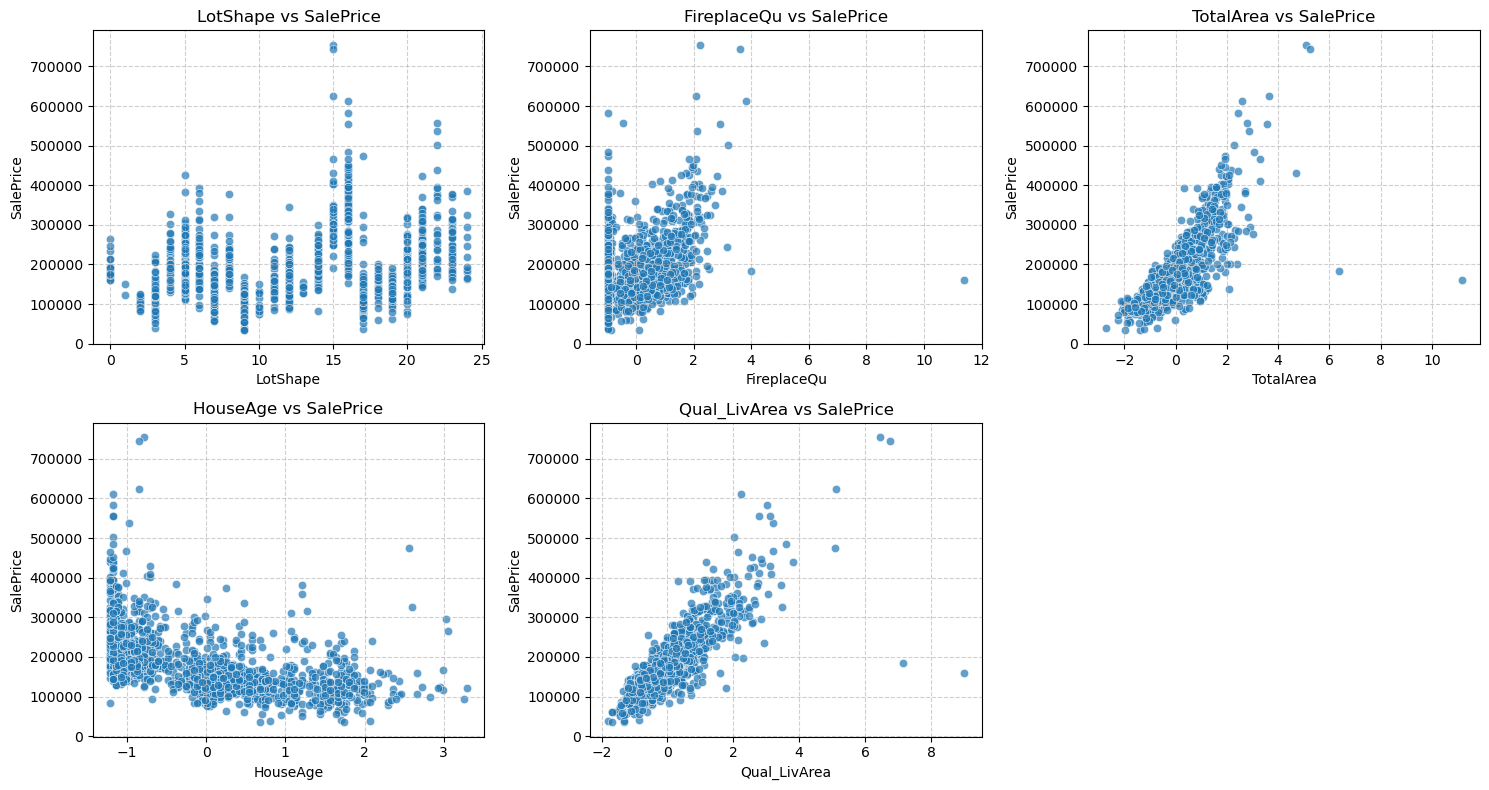

In [821]:
#removing outliers
def scatter_plot_features_vs_saleprice(df, features, target='SalePrice', cols=3):
    rows = (len(features) + cols - 1) // cols  # Calculate required rows
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  # Flatten to simplify indexing
    
    for i, feature in enumerate(features):
        sns.scatterplot(data=df, x=feature, y=target, alpha=0.7, ax=axes[i])
        axes[i].set_title(f'{feature} vs {target}', fontsize=12)
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel(target, fontsize=10)
        axes[i].grid(True, linestyle='--', alpha=0.6)
    
    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()  # Adjust layout for readability
    plt.show()

# Call the function for all features except 'SalePrice'
# Add 'SalePrice' back to X_encoded_selected
X_encoded_selected['SalePrice'] = t

# Define features (drop 'SalePrice' to avoid issues)
features = X_encoded_selected.drop(columns=['SalePrice']).columns

# Call the function
scatter_plot_features_vs_saleprice(X_encoded_selected, features, cols=3)

Now we manually remove outliers for each feature

In [823]:
X_encoded_selected = X_encoded_selected.drop(X_encoded_selected[(X_encoded_selected['Qual_LivArea'] > 4)].index)
X_encoded_selected = X_encoded_selected.drop(X_encoded_selected[(X_encoded_selected['HouseAge'] > 2.5) | (X_encoded_selected['SalePrice'] > 500000)].index)
X_encoded_selected = X_encoded_selected.drop(X_encoded_selected[(X_encoded_selected['TotalArea'] > 3) | (X_encoded_selected['SalePrice'] > 500000)].index)
X_encoded_selected = X_encoded_selected.drop(X_encoded_selected[(X_encoded_selected['FireplaceQu'] > 3) | (X_encoded_selected['SalePrice'] > 500000)].index)
X_encoded_selected = X_encoded_selected.drop(X_encoded_selected[(X_encoded_selected['LotShape'] > 500000)].index)

Let's see the changes to the graphs

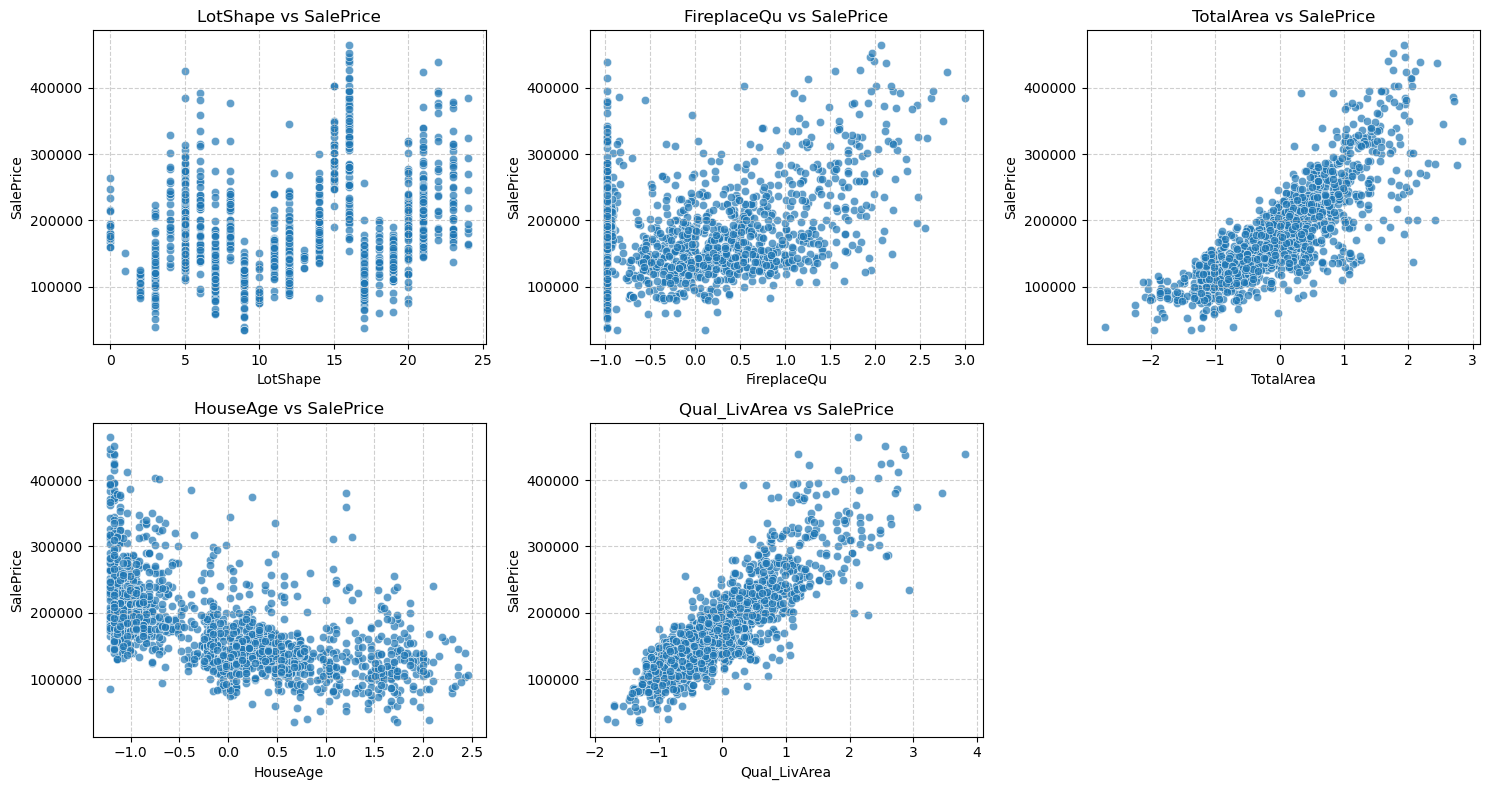

In [827]:
scatter_plot_features_vs_saleprice(X_encoded_selected, features, cols=3)

In [829]:
# remove target again
t = X_encoded_selected['SalePrice']
X_encoded_selected = X_encoded_selected.drop(columns=['SalePrice'])

## Testing models without PCA  
We chose not to use Locally Weighted Linear Regression (LWLR) because it tends to be computationally expensive, especially with large datasets, and may not offer significant improvements over simpler models like KNN or Decision Trees in terms of prediction accuracy. Additionally, the ensemble methods we used are more scalable and better suited for capturing complex patterns in the data.

---

In [832]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_selected, t, test_size=0.2, random_state=42)

# Hyperparameter tuning for KNN (before and after PCA)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)  # Apply before PCA
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Hyperparameter tuning for Decision Tree (before and after PCA)
param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)  # Apply before PCA
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Evaluating Models
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_knn = np.sqrt(mse_knn)
rmse_dt = np.sqrt(mse_dt)

# Printing results
print(f"KNN Root Mean Squared Error: {rmse_knn}")
print(f"Decision Tree Root Mean Squared Error: {rmse_dt}")

KNN Root Mean Squared Error: 25216.88600268055
Decision Tree Root Mean Squared Error: 28473.6005148736


## Applying PCA to reduce dimensions

---

Text(0, 0.5, 'Cumulative Explained Variance')

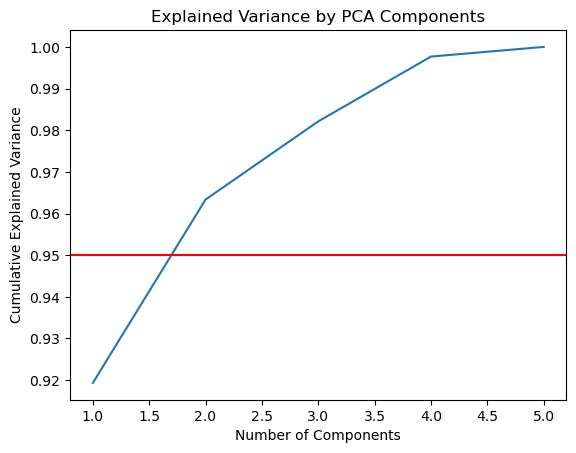

In [835]:
num_of_columns = len(X_encoded_selected.columns)
pca = PCA(n_components=num_of_columns).fit(X_encoded_selected)
y = np.cumsum(pca.explained_variance_ratio_) # compute the explained variance ratio for each PC
plt.plot(range(1,len(y)+1),y)
plt.axhline(y=0.95, color='r', linestyle='-') # aim to explain higher variance as possible, above 95%
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [837]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retaining 95% variance
X_pca = pca.fit_transform(X_encoded_selected)  # Transform the training data
test_pca = pca.transform(test_encoded_selected)  # Transform the test data

## Testing models with PCA

---

In [840]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, t, test_size=0.2, random_state=42)

# Hyperparameter tuning for KNN (after PCA)
grid_search_knn.fit(X_train_pca, y_train_pca)
best_knn = grid_search_knn.best_estimator_
y_pred_knn_pca = best_knn.predict(X_test_pca)

# Hyperparameter tuning for Decision Tree (after PCA)
grid_search_dt.fit(X_train_pca, y_train_pca)
best_dt = grid_search_dt.best_estimator_
y_pred_dt_pca = best_dt.predict(X_test_pca)

# Evaluating Models
mse_knn = mean_squared_error(y_test_pca, y_pred_knn_pca)
mse_dt = mean_squared_error(y_test_pca, y_pred_dt_pca)
rmse_knn = np.sqrt(mse_knn)
rmse_dt = np.sqrt(mse_dt)

# Printing results
print(f"KNN Root Mean Squared Error: {rmse_knn}")
print(f"Decision Tree Root Mean Squared Error: {rmse_dt}")

KNN Root Mean Squared Error: 24651.308229940034
Decision Tree Root Mean Squared Error: 26398.196399961376


## Ensemble comparisons (with and without PCA)  
Now we compare the ensemble methods with and without PCA while doing hyperparameter tuning as well.

---

               Model  PCA          RMSE  \
0        Bagging_KNN   No  25599.338847   
1        Bagging_KNN  Yes  24013.348003   
2         Bagging_DT   No  22758.186491   
3         Bagging_DT  Yes  25873.119633   
4      Random_Forest   No  23231.371008   
5      Random_Forest  Yes  26256.379849   
6  Gradient_Boosting   No  23708.951326   
7  Gradient_Boosting  Yes  25799.896369   

                                                              Best_Params  
0  {'estimator__n_neighbors': 3, 'max_samples': 1.0, 'n_estimators': 100}  
1  {'estimator__n_neighbors': 3, 'max_samples': 0.5, 'n_estimators': 100}  
2   {'estimator__max_depth': 10, 'max_samples': 0.5, 'n_estimators': 100}  
3   {'estimator__max_depth': 10, 'max_samples': 0.5, 'n_estimators': 100}  
4          {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}  
5         {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}  
6             {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}  
7   

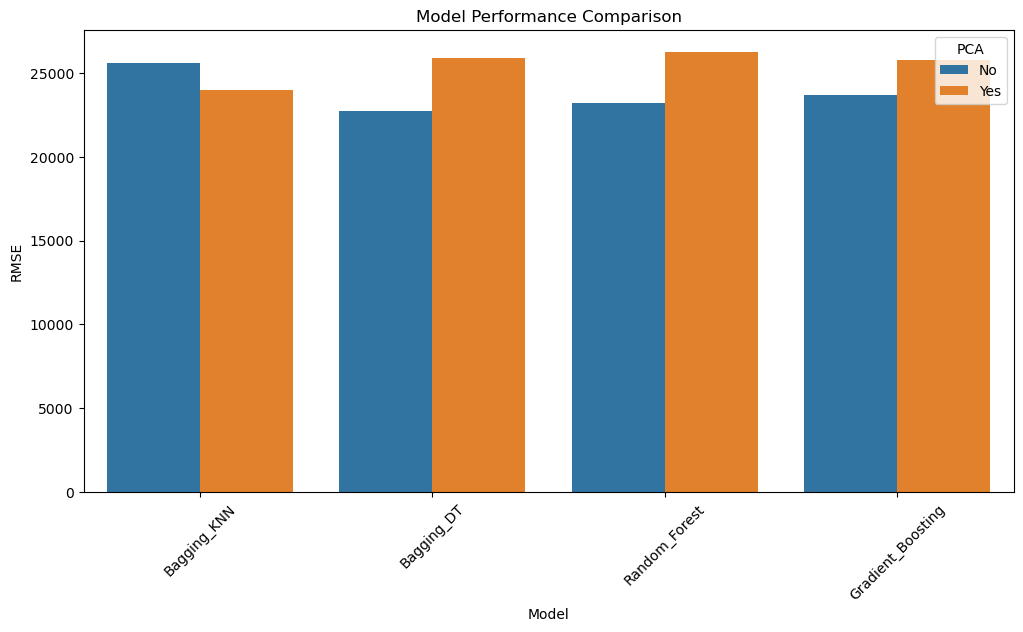

In [843]:
# 1. Bagging with both base models
bagging_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),
    random_state=42
)
bagging_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    random_state=42
)

param_grid_bagging_knn = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'estimator__n_neighbors': [3, 5, 7]
}

param_grid_bagging_dt = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'estimator__max_depth': [5, 10, None]
}

# 2. Random Forest (tree-based only)
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# 3. Gradient Boosting (tree-based only)
gb = GradientBoostingRegressor(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Create dictionary of models and their parameters
models = {
    'Bagging_KNN': (bagging_knn, param_grid_bagging_knn),
    'Bagging_DT': (bagging_dt, param_grid_bagging_dt),
    'Random_Forest': (rf, param_grid_rf),
    'Gradient_Boosting': (gb, param_grid_gb)
}

# Test all models with and without PCA
results = []
for name, (model, params) in models.items():
    # Without PCA
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({
        'Model': name,
        'PCA': 'No',
        'RMSE': rmse,
        'Best_Params': grid_search.best_params_
    })
    
    # With PCA
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_pca, y_train_pca)
    y_pred_pca = grid_search.predict(X_test_pca)
    rmse = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
    results.append({
        'Model': name,
        'PCA': 'Yes',
        'RMSE': rmse,
        'Best_Params': grid_search.best_params_
    })

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
print(results_df)

# Visualize results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='RMSE', hue='PCA')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.show()

## Model Selection and Evaluation  
We decided to use the BaggingKNN with PCA as our final model for predicting the house prices.  
This model has the lowest RMSE value between those who use PCA (as the assignment asked to use PCA) 

---

## Training vs Validation Loss Analysis  
The graph below illustrates the training and validation loss (Mean Squared Error, MSE) over multiple epochs during the model training process.   

---

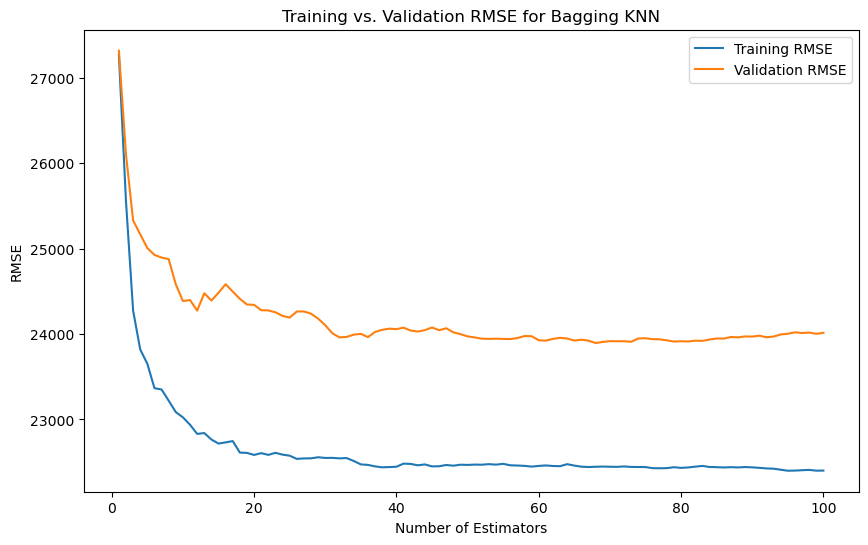

In [847]:
# Assuming X_encoded_selected and t are already defined
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, t, test_size=0.2, random_state=42)

# Define the Bagging KNN model with the given parameters
bagging_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(n_neighbors=3),
    random_state=42,
    n_estimators=100,
    max_samples=0.5
)

# Lists to store training and validation losses
train_losses = []
val_losses = []

# Train the model and record the losses for each iteration
for i in range(1, 101):
    bagging_knn.set_params(n_estimators=i)
    bagging_knn.fit(X_train, y_train)
    
    # Predict on training and validation sets
    y_train_pred = bagging_knn.predict(X_train)
    y_val_pred = bagging_knn.predict(X_val)
    
    # Calculate RMSE for training and validation sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    # Append the RMSE to the lists
    train_losses.append(train_rmse)
    val_losses.append(val_rmse)

# Plot the training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_losses, label='Training RMSE')
plt.plot(range(1, 101), val_losses, label='Validation RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Training vs. Validation RMSE for Bagging KNN')
plt.legend()
plt.show()

Key observations:  
- **Convergence**: Both losses decrease rapidly in the first 40 estimators, then stabilize, indicating the model has learned the data patterns.

This indicates the model is well-tuned, with balanced training and validation performance. Future steps could include early stopping to save time or further hyperparameter tuning for optimization.

## Exporting model results

In [851]:
# Define the best Bagging KNN model
best_bagging_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(n_neighbors=3),
    n_estimators=100,
    max_samples=0.5,
    random_state=42
)

# Train the model on the full training data
best_bagging_knn.fit(X_train_pca, y_train_pca)

# Predict on the test set
test_predictions = best_bagging_knn.predict(test_pca)

# Create a submission file
submission = pd.DataFrame({'Id': test_ID, 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

print("Saved the predictions to 'submission.csv'")

Saved the predictions to 'submission.csv'


## **Submission in Kaggle**  
We will now apply this trained model to make predictions on the test set and submit the results in the required format.  

---

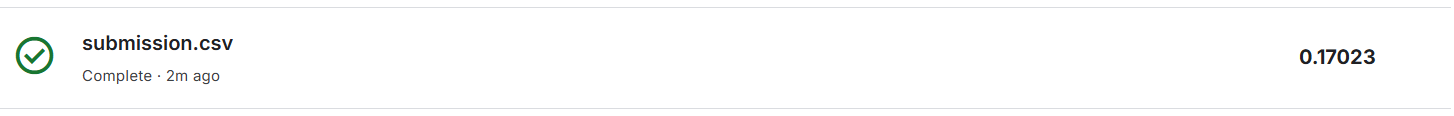

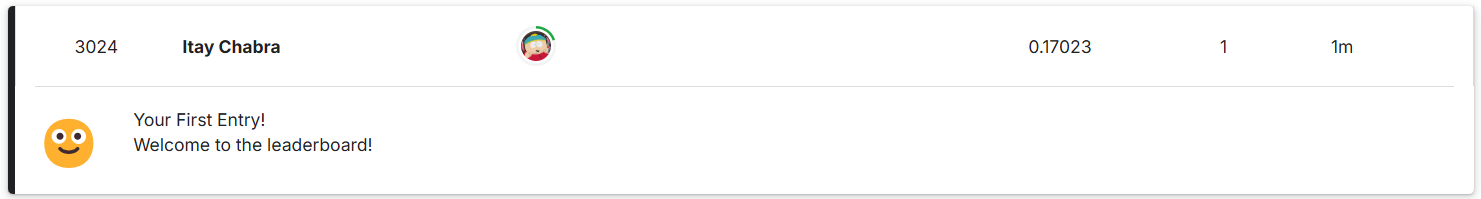

## **Summary**   
---

In this notebook, we worked on predicting a target variable using various regression techniques. The process began with data preprocessing, including feature encoding, scaling, and feature selection to optimize the input features. We then explored several models, including K-Nearest Neighbors (KNN), Decision Tree Regressor, and various ensemble methods like Bagging, Random Forest, and Gradient Boosting.

For each model, we performed hyperparameter tuning using GridSearchCV to identify the best configurations. We evaluated the models using Root Mean Squared Error (RMSE) and compared their performances both with and without Principal Component Analysis (PCA) to reduce feature dimensionality.

After testing multiple models and techniques, we selected the best-performing PCA configuration, trained it on the entire dataset, and made predictions on the test data. The predictions were saved in a submission file. The goal was to build a robust, accurate predictive model by combining various approaches and optimizing them for the best performance.  

**References:**  
- Lab notebooks
- Chat GPT